In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
  
  
uploaded = files.upload()

Saving train-data.csv to train-data.csv


In [44]:
df=pd.read_csv('train-data.csv')

In [45]:
df.shape

(6019, 14)

In [46]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [47]:
print(df['Location'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner_Type'].unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


In [48]:
df = df.drop('Unnamed: 0', axis =1)

Following variable are actually numerical variables encoded as categories:

Owner_Type

Mileage

Engine

Power

New_Price



In [49]:
col =  ['Mileage', 'Engine', 'Power', 'New_Price']
for col in col:
    print(list(df[col].dropna().apply(lambda x: x.split()[-1]).unique()))

['km/kg', 'kmpl']
['CC']
['bhp']
['Lakh', 'Cr']


In [50]:
def process_mileage(x):
   
    if type(x) == str:
        if x.split()[-1] == 'km/kg':
            return float(x.split()[0])*1.40
        elif x.split()[-1] == 'kmpl':
            return float(x.split()[0])
    else:
        return x
    
def process_engine(x):
   
    if type(x) == str:
        return float(x.split()[0])
    else:
        return x

def process_power(x):
    
    if type(x) == str:
        if float(x.split()[0] == 'null'):
            return np.nan
        return float(x.split()[0])
    else:
        return x
    
def process_new_price(x):
   
    if type(x) == str:
        if x.split()[-1] == 'Cr':
            return float(x.split()[0])*100
        return float(x.split()[0])
    else:
        return x


In [51]:
df['Mileage'] = df['Mileage'].apply(process_mileage)
df['Engine'] = df['Engine'].apply(process_engine)
df['Power'] = df['Power'].apply(process_power)
df['New_Price'] = df['New_Price'].apply(process_new_price)

In [52]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [53]:
df['no_year']=2021-df['Year']
df.drop(['Year'],axis=1,inplace=True)

In [54]:
df.head()

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,no_year
0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,NaN,1.75,11
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,6
2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10
3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,9
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,8


In [55]:
df.isnull().sum()

Name                    0
Location                0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
New_Price            5195
Price                   0
no_year                 0
dtype: int64

In [56]:
df.drop(['New_Price'],axis=1,inplace=True)

In [57]:
num_columns = df.select_dtypes(exclude = 'object').columns
print('Numerical Columns:',list(num_columns))

Numerical Columns: ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'no_year']


In [58]:
for column in ['Mileage', 'Engine', 'Power', 'Seats']:
    df[column] = df[column].fillna(df[column].median())

In [59]:
df['Brand_Name'] = df['Name'].apply(lambda x: x.split()[0])
df['Brand_Name'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Lamborghini         1
Isuzu               1
Smart               1
Ambassador          1
Bentley             1
Name: Brand_Name, dtype: int64

In [60]:
df['Brand_Name'] = df['Brand_Name'].apply(lambda x: 'Isuzu' if x == 'ISUZU' else x)
df['Brand_Name'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Isuzu               3
Force               3
Lamborghini         1
Smart               1
Ambassador          1
Bentley             1
Name: Brand_Name, dtype: int64

In [61]:
df.drop(['Name'],axis=1,inplace=True)

In [62]:
def extract_region(x):
    if x == 'Mumbai' or x == 'Pune' or x == 'Ahmedabad':
        return 'West'
    elif x == 'Bangalore' or x == 'Chennai' or x == 'Coimbatore' or x == 'Hyderabad' or x == 'Kochi':
        return 'South'
    elif x == 'Delhi' or x == 'Jaipur':
        return 'North'
    elif x == 'Kolkata':
        return 'East'

In [63]:
df['Region'] = df['Location'].apply(extract_region)
df['Region'].value_counts()

South    2881
West     1636
North     967
East      535
Name: Region, dtype: int64

In [64]:
df.drop(['Location'],axis=1,inplace=True)

In [65]:
df.head()

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,no_year,Brand_Name,Region
0,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75,11,Maruti,West
1,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,6,Hyundai,West
2,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,10,Honda,South
3,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,9,Maruti,South
4,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,8,Audi,South


In [66]:
 df['Owner_Type']=df['Owner_Type'].map({'First':4, 'Second':3, 'Third':2, 'Fourth & Above':1})

In [67]:
cat_col = list(df.select_dtypes(include = 'object').columns)
cat_col

['Fuel_Type', 'Transmission', 'Brand_Name', 'Region']

In [68]:
df=pd.get_dummies(df,drop_first=True)

In [69]:
df.head()

,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,no_year,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Brand_Name_Audi,Brand_Name_BMW,Brand_Name_Bentley,Brand_Name_Chevrolet,Brand_Name_Datsun,Brand_Name_Fiat,Brand_Name_Force,Brand_Name_Ford,Brand_Name_Honda,Brand_Name_Hyundai,Brand_Name_Isuzu,Brand_Name_Jaguar,Brand_Name_Jeep,Brand_Name_Lamborghini,Brand_Name_Land,Brand_Name_Mahindra,Brand_Name_Maruti,Brand_Name_Mercedes-Benz,Brand_Name_Mini,Brand_Name_Mitsubishi,Brand_Name_Nissan,Brand_Name_Porsche,Brand_Name_Renault,Brand_Name_Skoda,Brand_Name_Smart,Brand_Name_Tata,Brand_Name_Toyota,Brand_Name_Volkswagen,Brand_Name_Volvo,Region_North,Region_South,Region_West
0,72000,4,37.24,998.0,58.16,5.0,1.75,11,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,41000,4,19.67,1582.0,126.20,5.0,12.50,6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,46000,4,18.20,1199.0,88.70,5.0,4.50,10,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,87000,4,20.77,1248.0,88.76,7.0,6.00,9,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,40670,3,15.20,1968.0,140.80,5.0,17.74,8,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [70]:
num_columns = ['no_year', 'Kilometers_Driven', 'Engine', 'Power', 'Seats', 'Price', 'Mileage']
#function to cleaning outliers that has a position higher than 3 in z-score
def z_score(column, df):
    treshold = 3                   #our treshold to assume a data point is an outlier                                    
    mean = df[column].mean()       #our mean values in its column
    std  = df[column].std()        #our standard deviation values in its column
    for data in df[column]:
        z_score = (data-mean)/std  #our Z-Score
        
        #conditional for filtering outlier with changing the value with the same number that equal to 3 or -3 in Z-Score
        if z_score>treshold:       
            df.loc[df[column] == data, column] = (treshold*std)+mean 
        elif z_score<-treshold:
            df.loc[df[column] == data, column] = (-treshold*std)+mean 
    return df

for column in num_columns:          #do Z-score funtion to all the numerical columns in train dataset
    z_score(column, df)
    
df.describe()

,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,no_year,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Brand_Name_Audi,Brand_Name_BMW,Brand_Name_Bentley,Brand_Name_Chevrolet,Brand_Name_Datsun,Brand_Name_Fiat,Brand_Name_Force,Brand_Name_Ford,Brand_Name_Honda,Brand_Name_Hyundai,Brand_Name_Isuzu,Brand_Name_Jaguar,Brand_Name_Jeep,Brand_Name_Lamborghini,Brand_Name_Land,Brand_Name_Mahindra,Brand_Name_Maruti,Brand_Name_Mercedes-Benz,Brand_Name_Mini,Brand_Name_Mitsubishi,Brand_Name_Nissan,Brand_Name_Porsche,Brand_Name_Renault,Brand_Name_Skoda,Brand_Name_Smart,Brand_Name_Tata,Brand_Name_Toyota,Brand_Name_Volkswagen,Brand_Name_Volvo,Region_North,Region_South,Region_West
count,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.00000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,57460.396307,3.797142,18.234111,1614.621247,112.006363,5.270209,9.118003,7.625445,0.532480,0.000332,0.001661,0.456222,0.714238,0.039209,0.04436,0.000166,0.020103,0.002160,0.004652,0.000498,0.049842,0.101013,0.183918,0.000498,0.006646,0.002492,0.000166,0.009968,0.045190,0.201196,0.052833,0.004320,0.004486,0.015119,0.002991,0.024090,0.028742,0.000166,0.030902,0.068284,0.052334,0.003489,0.160658,0.478651,0.271806
std,35032.211954,0.456356,4.532809,574.637848,49.330142,0.762242,9.454641,3.212293,0.498985,0.018227,0.040730,0.498121,0.451814,0.194108,0.20591,0.012890,0.140364,0.046428,0.068052,0.022322,0.217637,0.301372,0.387449,0.022322,0.081256,0.049863,0.012890,0.099351,0.207738,0.400928,0.223718,0.065587,0.066831,0.122036,0.054608,0.153343,0.167095,0.012890,0.173067,0.252253,0.222719,0.058969,0.367246,0.499586,0.444927
min,171.000000,1.000000,3.605990,72.000000,34.200000,2.857752,0.440000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34000.000000,4.000000,15.260000,1198.000000,78.000000,5.000000,3.500000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53000.000000,4.000000,18.190000,1493.000000,97.700000,5.000000,5.640000,7.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,73000.000000,4.000000,21.100000,1969.000000,138.030000,5.000000,9.950000,10.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,332544.909914,4.000000,32.878922,3419.415594,272.734643,7.695828,43.043220,17.451027,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,

In [71]:
df.shape

(6019, 45)

In [72]:
df.isnull().sum()

Kilometers_Driven           0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
Price                       0
no_year                     0
Fuel_Type_Diesel            0
Fuel_Type_Electric          0
Fuel_Type_LPG               0
Fuel_Type_Petrol            0
Transmission_Manual         0
Brand_Name_Audi             0
Brand_Name_BMW              0
Brand_Name_Bentley          0
Brand_Name_Chevrolet        0
Brand_Name_Datsun           0
Brand_Name_Fiat             0
Brand_Name_Force            0
Brand_Name_Ford             0
Brand_Name_Honda            0
Brand_Name_Hyundai          0
Brand_Name_Isuzu            0
Brand_Name_Jaguar           0
Brand_Name_Jeep             0
Brand_Name_Lamborghini      0
Brand_Name_Land             0
Brand_Name_Mahindra         0
Brand_Name_Maruti           0
Brand_Name_Mercedes-Benz    0
Brand_Name_Mini             0
Brand_Name_Mitsubishi       0
Brand_Name

In [73]:
y = df['Price']
X = df.drop(["Price"], axis =1) 
X.head()

,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,no_year,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Brand_Name_Audi,Brand_Name_BMW,Brand_Name_Bentley,Brand_Name_Chevrolet,Brand_Name_Datsun,Brand_Name_Fiat,Brand_Name_Force,Brand_Name_Ford,Brand_Name_Honda,Brand_Name_Hyundai,Brand_Name_Isuzu,Brand_Name_Jaguar,Brand_Name_Jeep,Brand_Name_Lamborghini,Brand_Name_Land,Brand_Name_Mahindra,Brand_Name_Maruti,Brand_Name_Mercedes-Benz,Brand_Name_Mini,Brand_Name_Mitsubishi,Brand_Name_Nissan,Brand_Name_Porsche,Brand_Name_Renault,Brand_Name_Skoda,Brand_Name_Smart,Brand_Name_Tata,Brand_Name_Toyota,Brand_Name_Volkswagen,Brand_Name_Volvo,Region_North,Region_South,Region_West
0,72000.0,4,32.878922,998.0,58.16,5.0,11.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,41000.0,4,19.670000,1582.0,126.20,5.0,6.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,46000.0,4,18.200000,1199.0,88.70,5.0,10.0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,87000.0,4,20.770000,1248.0,88.76,7.0,9.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,40670.0,3,15.200000,1968.0,140.80,5.0,8.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [74]:
X.rename(columns={"Brand_Name_Mercedes-Benz":"Brand_Name_Mercedes"},inplace=True)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [77]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [78]:
rf.score(X_train, y_train)

0.9903315302123185

In [79]:
rf.score(X_test,y_test)

0.9272439923561446

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1300, num = 6)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 340, 580, 820, 1060, 1300], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 25, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  8.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1300}

In [80]:
hyper_forest = RandomForestRegressor(
     n_estimators= 1300,
     min_samples_split= 2,
     min_samples_leaf= 1,
     max_features= 'auto',
     max_depth= 15,
     criterion= 'mse')
hyper_forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [81]:
hyper_forest.score(X_test, y_test)

0.9288944951633464

In [82]:
predictions=hyper_forest.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


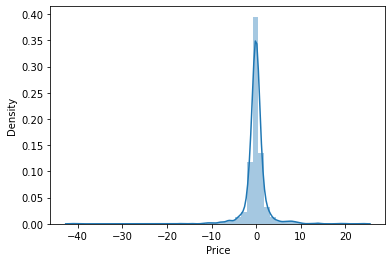

In [83]:
sns.distplot(y_test-predictions)

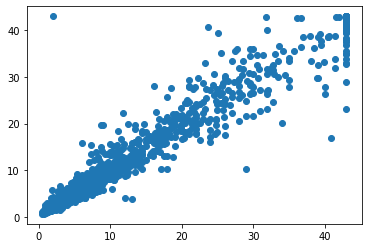

In [84]:
plt.scatter(y_test,predictions)

In [90]:
import pickle
# Make our file
file = open('used_car_price_pred.pkl', 'wb')

# transfer the information to out pkl file
pickle.dump(hyper_forest, file)

In [91]:
from google.colab import files
files.download("used_car_price_pred.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>